In [6]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from math import pi

In [5]:
pip install python-math

Note: you may need to restart the kernel to use updated packages.


## Day 19 visualizing "Radar Chart"

In [2]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## A radar chart, also known as a spider or web chart, displays multivariate data in the form of a two-dimensional chart with multiple axes originating from the same point. It is used to compare multiple variables or categories by plotting them on a circular graph, making it easy to visualize performance or characteristics across different dimensions. Radar charts are best used when comparing a few sets of data with multiple attributes, such as comparing the characteristics of different species in the Iris dataset.

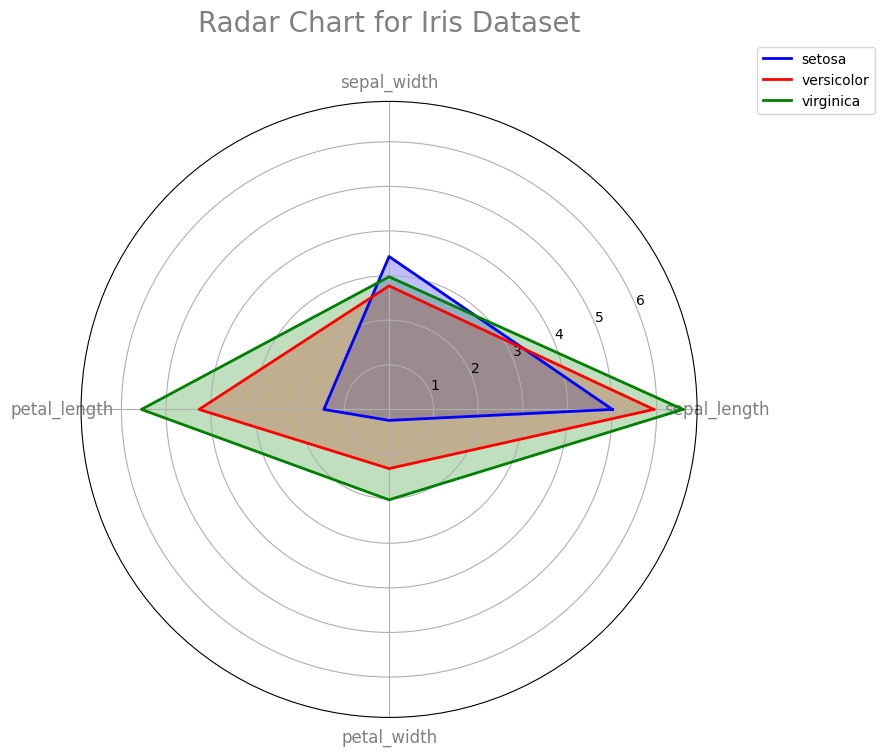

In [7]:
# Calculate the mean for each species
df_mean = df.groupby('species').mean().reset_index()

# Number of variables we're plotting.
categories = list(df_mean.columns[1:])
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Function to plot each species
def add_to_radar(sp, color):
    values = df_mean.loc[df_mean['species'] == sp].drop('species', axis=1).values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid', label=sp)
    ax.fill(angles, values, color=color, alpha=0.25)

# Plot each species
add_to_radar('setosa', 'b')
add_to_radar('versicolor', 'r')
add_to_radar('virginica', 'g')

# Add labels
plt.xticks(angles[:-1], categories, color='grey', size=12)

# Add a title and legend
plt.title('Radar Chart for Iris Dataset', size=20, color='grey', y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()